In [ ]:
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from plotly.subplots import make_subplots
from scipy.stats.contingency import association
from google.colab import files
from pandas.core.frame import DataFrame
from math import ceil
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
FTest = pd.read_csv('FTest.csv')
FTrain = pd.read_csv('FTrain.csv')


In [ ]:
FTest

,Observation,power,water,hotwater,gas,electricity,heating
0,529,0.34,0.0490,0.0824,0.9248,0.1783,0.3218
1,8813,0.56,0.0198,0.0070,0.3755,0.9354,0.1131
2,800,0.56,0.1843,0.0198,0.2827,0.1782,0.9164
3,5635,0.87,0.0632,0.0051,0.3787,0.9011,0.8814
4,1499,0.21,0.0306,0.0128,0.6965,0.8167,0.8387
...,...,...,...,...,...,...,...
758,1163,0.28,0.0103,0.0035,0.2723,0.1606,0.4988
759,9180,0.54,0.1063,0.0701,0.1226,0.3963,0.3754
760,9368,0.72,0.1205,0.0231,0.3324,0.6593,0.5473
761,406,0.58,0.0598,0.0335,0.8156,0.3086,0.4715


In [ ]:
FTrain

,Observation,power,water,hotwater,prediction,gas,electricity,heating
0,2008,-1679.910799,6558.391985,0.290050,0,0.5741,0.1778,0.6940
1,6295,-3561.894102,5621.947292,0.346400,1,0.6492,0.3770,0.5949
2,4379,-5298.450591,8545.846886,0.277300,1,0.5016,0.5607,0.9043
3,9242,-8141.870791,1683.065834,0.031400,0,0.0628,0.8616,0.1781
4,5118,-302.638755,6829.686142,0.396650,1,0.6841,0.0321,0.7227
...,...,...,...,...,...,...,...,...
1774,6984,-5015.728045,3794.245998,0.151889,0,0.2816,0.5308,0.4015
1775,8189,-6081.565289,2686.704858,0.344550,0,0.6575,0.6436,0.2843
1776,6381,-550.537604,2367.283516,0.276877,0,0.5347,0.0583,0.2505
1777,9005,-6178.871494,1159.555854,0.215350,1,0.3185,0.6539,0.1227


In [ ]:
FTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  1779 non-null   int64  
 1   power        1465 non-null   float64
 2   water        1691 non-null   float64
 3   hotwater     1771 non-null   float64
 4   prediction   1779 non-null   int64  
 5   gas          1771 non-null   float64
 6   electricity  1465 non-null   float64
 7   heating      1691 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 111.3 KB


In [ ]:
FTrain

,Observation,power,water,hotwater,prediction,gas,electricity,heating
0,2008,-1679.910799,6558.391985,0.290050,0,0.5741,0.1778,0.6940
1,6295,-3561.894102,5621.947292,0.346400,1,0.6492,0.3770,0.5949
2,4379,-5298.450591,8545.846886,0.277300,1,0.5016,0.5607,0.9043
3,9242,-8141.870791,1683.065834,0.031400,0,0.0628,0.8616,0.1781
4,5118,-302.638755,6829.686142,0.396650,1,0.6841,0.0321,0.7227
...,...,...,...,...,...,...,...,...
1774,6984,-5015.728045,3794.245998,0.151889,0,0.2816,0.5308,0.4015
1775,8189,-6081.565289,2686.704858,0.344550,0,0.6575,0.6436,0.2843
1776,6381,-550.537604,2367.283516,0.276877,0,0.5347,0.0583,0.2505
1777,9005,-6178.871494,1159.555854,0.215350,1,0.3185,0.6539,0.1227


In [ ]:
FTrain

,Observation,power,water,hotwater,prediction,gas,electricity,heating
0,2008,-1679.910799,6558.391985,0.290050,0,0.5741,0.1778,0.6940
1,6295,-3561.894102,5621.947292,0.346400,1,0.6492,0.3770,0.5949
2,4379,-5298.450591,8545.846886,0.277300,1,0.5016,0.5607,0.9043
3,9242,-8141.870791,1683.065834,0.031400,0,0.0628,0.8616,0.1781
4,5118,-302.638755,6829.686142,0.396650,1,0.6841,0.0321,0.7227
...,...,...,...,...,...,...,...,...
1774,6984,-5015.728045,3794.245998,0.151889,0,0.2816,0.5308,0.4015
1775,8189,-6081.565289,2686.704858,0.344550,0,0.6575,0.6436,0.2843
1776,6381,-550.537604,2367.283516,0.276877,0,0.5347,0.0583,0.2505
1777,9005,-6178.871494,1159.555854,0.215350,1,0.3185,0.6539,0.1227


In [ ]:
"""
num_cols = 3
num_rows = ceil(len(FTrain.columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))
axes = axes.flatten()

pastel_colors = sns.color_palette("pastel")

for col, ax in zip(FTrain.columns, axes):
    FTrain[col].value_counts().plot(kind='bar', ax=ax, color=pastel_colors)
    ax.set_title(col)

# Hide unused subplots
for j in range(len(FTrain.columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
"""

'\nnum_cols = 3\nnum_rows = ceil(len(FTrain.columns) / num_cols)\n\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))\naxes = axes.flatten()\n\npastel_colors = sns.color_palette("pastel")\n\nfor col, ax in zip(FTrain.columns, axes):\n    FTrain[col].value_counts().plot(kind=\'bar\', ax=ax, color=pastel_colors)\n    ax.set_title(col)\n\n# Hide unused subplots\nfor j in range(len(FTrain.columns), num_rows * num_cols):\n    fig.delaxes(axes[j])\n\nplt.tight_layout()\nplt.show()\n'

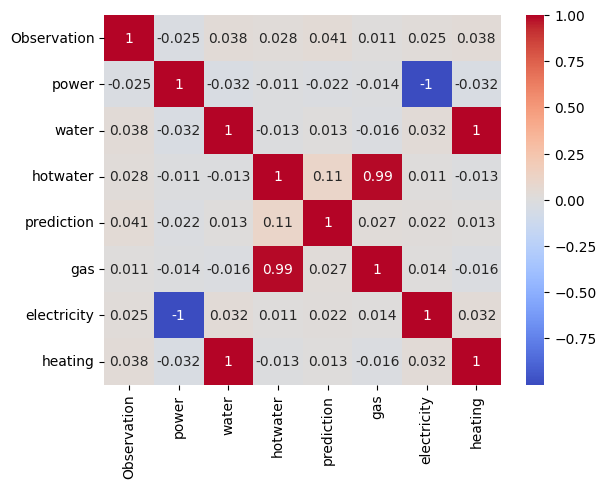

In [ ]:
corr_matrix = FTrain.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

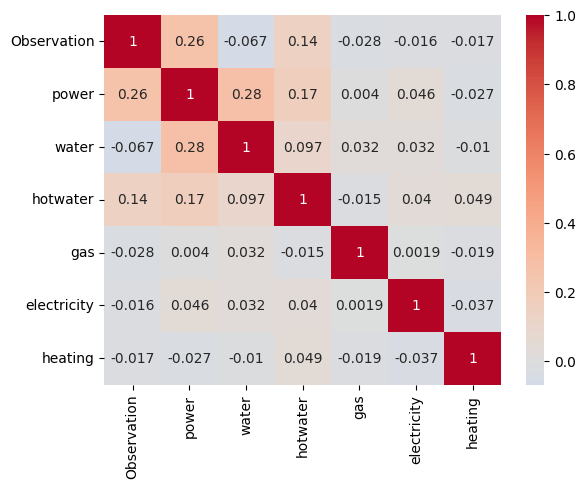

In [ ]:
corr_matrix = FTest.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
duplicates = FTrain[FTrain.duplicated()]

# Print or display the duplicated rows
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
Empty DataFrame
Columns: [Observation, power, water, hotwater, prediction, gas, electricity, heating]
Index: []


In [ ]:
duplicate_rows = FTrain[FTrain.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")
data = FTrain.drop_duplicates()
duplicate_rows = FTrain[FTrain.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0
Number of duplicate rows: 0


In [ ]:
FTrain.isna().values.any()

True

In [ ]:
na_percentage = (FTrain.isna().sum() / len(FTrain)) * 100


In [ ]:
na_percentage

Observation     0.000000
power          17.650365
water           4.946599
hotwater        0.449691
prediction      0.000000
gas             0.449691
electricity    17.650365
heating         4.946599
dtype: float64

In [ ]:
print(f"Shape of dataset before removing duplicates: {FTrain.shape}")
print(f"Number of duplicates: {FTrain.duplicated().sum()}")
FTrain.drop_duplicates(inplace=True)
print(f"Shape of dataset after removing duplicates: {FTrain.shape}")

Shape of dataset before removing duplicates: (1779, 8)
Number of duplicates: 0
Shape of dataset after removing duplicates: (1779, 8)


In [ ]:
missing_percentage = FTrain.isna().sum() * 100 / len(data)
dtypes = FTrain.dtypes

df_missing_values = pd.DataFrame({
    'dtype': dtypes,
    'missing_count': FTrain.isna().sum(),
    'missing_percentage': missing_percentage})

df_missing_values[df_missing_values.missing_count != 0]

,dtype,missing_count,missing_percentage
power,float64,314,17.650365
water,float64,88,4.946599
hotwater,float64,8,0.449691
gas,float64,8,0.449691
electricity,float64,314,17.650365
heating,float64,88,4.946599


In [ ]:
"""
from sklearn.model_selection import GridSearchCV
#parm={'n_neighbors':np.arange(1,20),'metric':['minkowski','euclidean','manhattan'],'weights' : ['uniform', 'distance']}
#grid=GridSearchCV(KNeighborsClassifier(),param_grid=parm,cv=5)
#grid.fit(X_train,y_train)
"""


"\nfrom sklearn.model_selection import GridSearchCV\n#parm={'n_neighbors':np.arange(1,20),'metric':['minkowski','euclidean','manhattan'],'weights' : ['uniform', 'distance']}\n#grid=GridSearchCV(KNeighborsClassifier(),param_grid=parm,cv=5)\n#grid.fit(X_train,y_train)\n"

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
import numpy as np




data_impute = FTrain.copy()

# Boucle pour itérer sur chaque colonne
for col in data_impute.columns:
    # Vérifier si la colonne contient des valeurs manquantes
    if data_impute[col].isnull().sum() > 0:
        # Créer l'imputeur KNN
        knn_imputer = KNNImputer(n_neighbors=5)

        # Imputer les valeurs manquantes de la colonne
        data_impute[col] = knn_imputer.fit_transform(data_impute[[col]])

# Afficher le DataFrame avec les valeurs manquantes imputées
print(data_impute)
FTrain=data_impute

      Observation        power        water  hotwater  prediction     gas  \
0            2008 -1679.910799  6558.391985  0.290050           0  0.5741   
1            6295 -3561.894102  5621.947292  0.346400           1  0.6492   
2            4379 -5298.450591  8545.846886  0.277300           1  0.5016   
3            9242 -8141.870791  1683.065834  0.031400           0  0.0628   
4            5118  -302.638755  6829.686142  0.396650           1  0.6841   
...           ...          ...          ...       ...         ...     ...   
1774         6984 -5015.728045  3794.245998  0.151889           0  0.2816   
1775         8189 -6081.565289  2686.704858  0.344550           0  0.6575   
1776         6381  -550.537604  2367.283516  0.276877           0  0.5347   
1777         9005 -6178.871494  1159.555854  0.215350           1  0.3185   
1778         9264 -5532.733492  4123.087439  0.273050           0  0.5461   

      electricity  heating  
0          0.1778   0.6940  
1          0.3770

In [ ]:
FTrain

,Observation,power,water,hotwater,prediction,gas,electricity,heating
0,2008,-1679.910799,6558.391985,0.290050,0,0.5741,0.1778,0.6940
1,6295,-3561.894102,5621.947292,0.346400,1,0.6492,0.3770,0.5949
2,4379,-5298.450591,8545.846886,0.277300,1,0.5016,0.5607,0.9043
3,9242,-8141.870791,1683.065834,0.031400,0,0.0628,0.8616,0.1781
4,5118,-302.638755,6829.686142,0.396650,1,0.6841,0.0321,0.7227
...,...,...,...,...,...,...,...,...
1774,6984,-5015.728045,3794.245998,0.151889,0,0.2816,0.5308,0.4015
1775,8189,-6081.565289,2686.704858,0.344550,0,0.6575,0.6436,0.2843
1776,6381,-550.537604,2367.283516,0.276877,0,0.5347,0.0583,0.2505
1777,9005,-6178.871494,1159.555854,0.215350,1,0.3185,0.6539,0.1227


In [ ]:
missing_percentage = FTrain.isna().sum() * 100 / len(FTrain)
dtypes = FTrain.dtypes

df_missing_values = pd.DataFrame({
    'dtype': dtypes,
    'missing_count': FTrain.isna().sum(),
    'missing_percentage': missing_percentage})

df_missing_values[df_missing_values.missing_count != 0]

,dtype,missing_count,missing_percentage


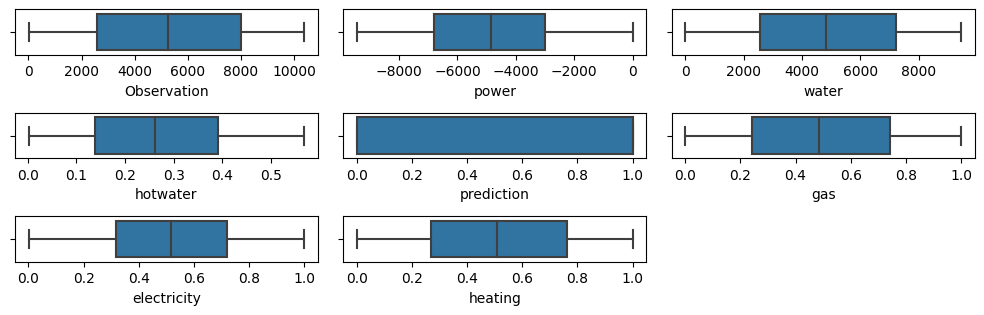

In [ ]:
numeric_columns = FTrain.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)
num_rows = (num_cols - 1) // 5 + 1

# fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

# Create a new figure
plt.figure(figsize=(10, 8))

# Loop over the features and create a boxplot for each one
for i, feature in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 3, i+1)
    sns.boxplot(x=FTrain[feature])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
FTest.describe()


,Observation,power,water,hotwater,gas,electricity,heating
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,5429.698558,0.457155,0.051095,0.019288,0.502092,0.509886,0.501409
std,3061.812131,0.191974,0.055719,0.023655,0.292529,0.286768,0.292139
min,4.000000,0.000000,0.000000,0.000000,0.000900,0.001200,0.000700
25%,2791.500000,0.320000,0.010550,0.001800,0.257900,0.265700,0.250800
50%,5628.000000,0.420000,0.030000,0.009527,0.493300,0.514500,0.505000
75%,8174.000000,0.580000,0.069900,0.028900,0.756650,0.761000,0.760450
max,10328.000000,0.980000,0.253500,0.157300,0.999400,0.998200,0.997800


In [ ]:
FTrain.describe()

,Observation,power,water,hotwater,prediction,gas,electricity,heating
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.00000,1779.000000
mean,5259.465992,-4866.923224,4819.572058,0.264010,0.500843,0.490787,0.51506,0.509996
std,2998.419207,2479.618677,2684.684085,0.146937,0.500140,0.288278,0.26239,0.284090
min,6.000000,-9437.831829,7.608694,0.001550,0.000000,0.000700,0.00080,0.000800
25%,2595.500000,-6814.576861,2554.856232,0.137900,0.000000,0.242000,0.31875,0.270350
50%,5240.000000,-4866.923224,4819.572058,0.261950,1.000000,0.484000,0.51506,0.509996
75%,8000.000000,-3011.629788,7218.974612,0.390325,1.000000,0.741650,0.72115,0.763900
max,10379.000000,-7.080094,9449.183069,0.568150,1.000000,0.999900,0.99870,0.999900


In [ ]:
FTest

,Observation,power,water,hotwater,gas,electricity,heating
0,529,0.34,0.0490,0.0824,0.9248,0.1783,0.3218
1,8813,0.56,0.0198,0.0070,0.3755,0.9354,0.1131
2,800,0.56,0.1843,0.0198,0.2827,0.1782,0.9164
3,5635,0.87,0.0632,0.0051,0.3787,0.9011,0.8814
4,1499,0.21,0.0306,0.0128,0.6965,0.8167,0.8387
...,...,...,...,...,...,...,...
758,1163,0.28,0.0103,0.0035,0.2723,0.1606,0.4988
759,9180,0.54,0.1063,0.0701,0.1226,0.3963,0.3754
760,9368,0.72,0.1205,0.0231,0.3324,0.6593,0.5473
761,406,0.58,0.0598,0.0335,0.8156,0.3086,0.4715


In [ ]:
FTrain['power'] = FTrain['power'].abs()
FTrain

,Observation,power,water,hotwater,prediction,gas,electricity,heating
0,2008,1679.910799,6558.391985,0.290050,0,0.5741,0.1778,0.6940
1,6295,3561.894102,5621.947292,0.346400,1,0.6492,0.3770,0.5949
2,4379,5298.450591,8545.846886,0.277300,1,0.5016,0.5607,0.9043
3,9242,8141.870791,1683.065834,0.031400,0,0.0628,0.8616,0.1781
4,5118,302.638755,6829.686142,0.396650,1,0.6841,0.0321,0.7227
...,...,...,...,...,...,...,...,...
1774,6984,5015.728045,3794.245998,0.151889,0,0.2816,0.5308,0.4015
1775,8189,6081.565289,2686.704858,0.344550,0,0.6575,0.6436,0.2843
1776,6381,550.537604,2367.283516,0.276877,0,0.5347,0.0583,0.2505
1777,9005,6178.871494,1159.555854,0.215350,1,0.3185,0.6539,0.1227


In [ ]:
sc = MinMaxScaler()
#FTrain['power'] = sc.fit_transform(FTrain['power'])
colonne_reshaped = FTrain['power'].values.reshape(-1, 1)

# Appliquer le scaling à la colonne
colonne_scaled = sc.fit_transform(colonne_reshaped)

# Assigner les valeurs scalées à la colonne correspondante dans le DataFrame
FTrain['power']= colonne_scaled

In [ ]:
sc = MinMaxScaler()
#FTrain['power'] = sc.fit_transform(FTrain['power'])
colonne_reshaped = FTrain['water'].values.reshape(-1, 1)

# Appliquer le scaling à la colonne
colonne_scaled = sc.fit_transform(colonne_reshaped)

# Assigner les valeurs scalées à la colonne correspondante dans le DataFrame
FTrain['water']= colonne_scaled

In [ ]:

sc = MinMaxScaler()
#FTrain['power'] = sc.fit_transform(FTrain['power'])
colonne_reshaped = FTrain['Observation'].values.reshape(-1, 1)

# Appliquer le scaling à la colonne
colonne_scaled = sc.fit_transform(colonne_reshaped)

# Assigner les valeurs scalées à la colonne correspondante dans le DataFrame
FTrain['Observation']= colonne_scaled

In [ ]:
FTrain

,Observation,power,water,hotwater,prediction,gas,electricity,heating
0,0.193001,0.177380,0.693823,0.290050,0,0.5741,0.1778,0.6940
1,0.606286,0.376939,0.594640,0.346400,1,0.6492,0.3770,0.5949
2,0.421575,0.561076,0.904324,0.277300,1,0.5016,0.5607,0.9043
3,0.890389,0.862581,0.177455,0.031400,0,0.0628,0.8616,0.1781
4,0.492818,0.031340,0.722557,0.396650,1,0.6841,0.0321,0.7227
...,...,...,...,...,...,...,...,...
1774,0.672708,0.531097,0.401060,0.151889,0,0.2816,0.5308,0.4015
1775,0.788875,0.644115,0.283755,0.344550,0,0.6575,0.6436,0.2843
1776,0.614576,0.057626,0.249924,0.276877,0,0.5347,0.0583,0.2505
1777,0.867541,0.654433,0.122008,0.215350,1,0.3185,0.6539,0.1227


In [ ]:
FTest

,Observation,power,water,hotwater,gas,electricity,heating
0,529,0.34,0.0490,0.0824,0.9248,0.1783,0.3218
1,8813,0.56,0.0198,0.0070,0.3755,0.9354,0.1131
2,800,0.56,0.1843,0.0198,0.2827,0.1782,0.9164
3,5635,0.87,0.0632,0.0051,0.3787,0.9011,0.8814
4,1499,0.21,0.0306,0.0128,0.6965,0.8167,0.8387
...,...,...,...,...,...,...,...
758,1163,0.28,0.0103,0.0035,0.2723,0.1606,0.4988
759,9180,0.54,0.1063,0.0701,0.1226,0.3963,0.3754
760,9368,0.72,0.1205,0.0231,0.3324,0.6593,0.5473
761,406,0.58,0.0598,0.0335,0.8156,0.3086,0.4715


In [ ]:
FTrain=FTrain.drop(['Observation','electricity','heating','hotwater'],axis=1)

In [ ]:
FTrain=FTrain.drop(['water'],axis=1)


In [ ]:
#FTrain=FTrain.drop(['Observation'],axis=1)


In [ ]:
FTrain

,power,prediction,gas
0,0.177380,0,0.5741
1,0.376939,1,0.6492
2,0.561076,1,0.5016
3,0.862581,0,0.0628
4,0.031340,1,0.6841
...,...,...,...
1774,0.531097,0,0.2816
1775,0.644115,0,0.6575
1776,0.057626,0,0.5347
1777,0.654433,1,0.3185


In [ ]:
x = FTrain.drop('prediction', axis=1)
y=FTrain['prediction']

In [ ]:
x = FTrain.drop('prediction', axis=1)
y=FTrain['prediction']

In [ ]:
print(x.shape)
print(y.shape)

(1779, 2)
(1779,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)


In [ ]:
parm={'n_neighbors':np.arange(1,20),'metric':['minkowski','euclidean','manhattan'],'weights' : ['uniform', 'distance']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=parm,cv=3,scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='minkowski')                          # n_neighbors=1

KNN.fit(X_train,y_train)                          # la méthode fit pour entrainer un modèle

KNN.score(X_test,y_test)

0.4681647940074906

In [ ]:
def submission(model) :
    test = pd.read_csv('FTest.csv')
    test=test.drop(['Observation','electricity','heating','hotwater','water'],axis=1)
    features = test.columns
    test['prediction'] = model.predict(test[features])

    # Add an 'id' column ranging from 0 to the length of rows
    test['id'] = range(len(test))

    # Create a new DataFrame with 'id' and 'prediction' columns
    submission = test[['id', 'prediction']]

    # Save the submission file to CSV
    submission.to_csv('submission.csv', index=False)
submission(KNN)